### 8中内置的浸润方法 https://blog.csdn.net/Ayue0616/article/details/131009335

In [1]:
setwd('/import/liujing/data2/')

In [73]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

In [74]:
head(data,2)

,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [75]:
data = data[!duplicated(data$Gene_name),]

In [76]:
expr = data %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'Gene_name') 
Group = c(rep('con',31),rep('CI',43))

In [77]:
library(IOBR)

In [72]:
head(expr,2)

,MUS81,UCK2,CNIH3,OTUD4
,<dbl>,<dbl>,<dbl>,<dbl>
C10,6.348475,1.332365,0.7209825,10.90454
C11,5.446330,1.249517,0.3007946,10.22671


In [99]:
expr_coad <- log2(expr+0.1)
#expr_coad = expr
expr_coad <- expr_coad[apply(expr_coad,1,sd)>0.5,]

In [100]:
tme_deconvolution_methods

MCPcounter               EPIC              xCell          CIBERSORT 
      "mcpcounter"             "epic"            "xcell"        "cibersort" 
CIBERSORT Absolute                IPS           ESTIMATE                SVR 
   "cibersort_abs"              "ips"         "estimate"              "svr" 
              lsei              TIMER          quanTIseq 
            "lsei"            "timer"        "quantiseq"

In [101]:
dim(expr_coad)

[1] 11682    74

In [102]:
im_ssgsea <- deconvo_tme(eset = expr_coad,
                            method = "cibersort ",
                            arrays = F,
                            perm = 1000
                            )

In [103]:
library(dplyr)

In [ ]:
# library(tidyverse)

# cellMarker <- read.csv("/import/liujing/data/cellmarker.txt", header = F, sep = "\t") # 用EXCEL打开删除NA列
# cellMarker <- cellMarker %>% column_to_rownames("V1") %>% t()

# a <- cellMarker
# a <- a[1:nrow(a), ]
# set <- colnames(a)
# geneSet <- list()
# # i <- "Activated CD8 T cell"
# for (i in set) {
#   x <-  as.character(a[,i])
#   x <- x[nchar(x)!=0]
#   x <-  as.character(x)
#   geneSet[[i]] <-x
# }

# im_ssgsea <- calculate_sig_score(eset = expr_coad, signature = geneSet , method = "ssgsea")

In [104]:
ssgeea = im_ssgsea

In [105]:
ssgeea = ssgeea %>%  tibble::column_to_rownames(.,'ID') %>% t() 

ERROR: [1m[33mError[39m in `tibble::column_to_rownames()`:[22m
[1m[22m[33m![39m Can't find column `ID` in `.data`.


In [87]:
im_ssgsea$group <- Group # CIBERSORT中的数据

In [88]:
#write.table(im_ssgsea, "ssGSEA.txt", sep = "\t", row.names = T, col.names = NA, quote = F)

In [89]:
# ssgsea.1 <- ssgsea
# for (i in colnames(ssgsea)) {
#   #i <- colnames(ssgsea)[1]
#   ssgsea.1[,i] <- (ssgsea[,i] -min(ssgsea[,i]))/(max(ssgsea[,i] )-min(ssgsea[,i] ))
  
# }
# apply(ssgsea.1[,1:6], 2, range)

In [90]:
library(ggpubr)

In [91]:
options(repr.plot.width = 12)

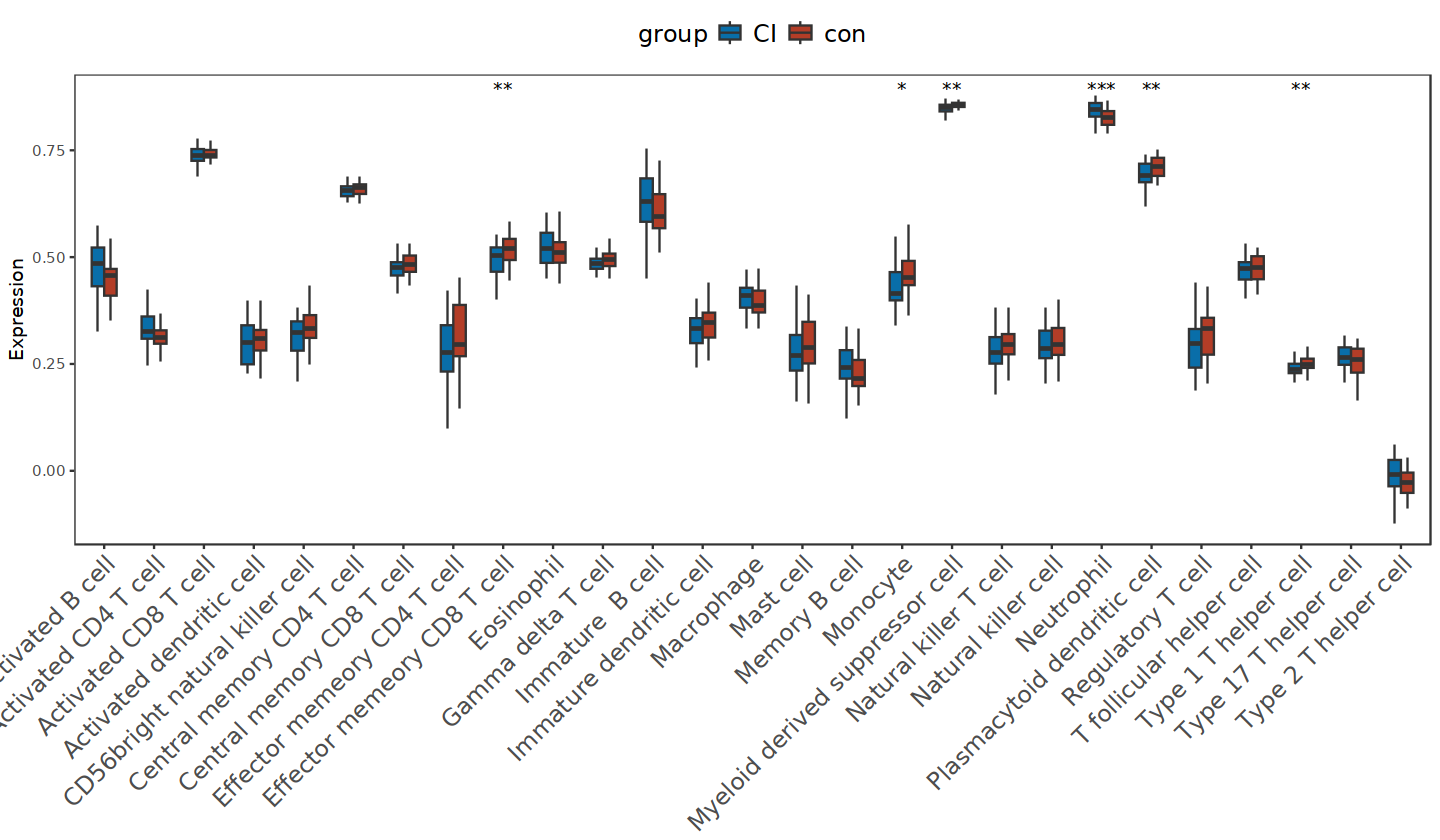

In [92]:
LUAD_ggsea <- gather(im_ssgsea,key = ssgsea, value = Expression, -c(group,ID)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 0.5), 
        axis.text.x = element_text(angle = 45, hjust = 1 ,size = 14),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "t.test",
                     hide.ns = T)

In [61]:
expr = expr[c('MUS81','UCK2','CNIH3','OTUD4'),] %>% t() %>%  as.data.frame()

In [64]:
cell   = ssgeea %>% t() %>% as.data.frame() 

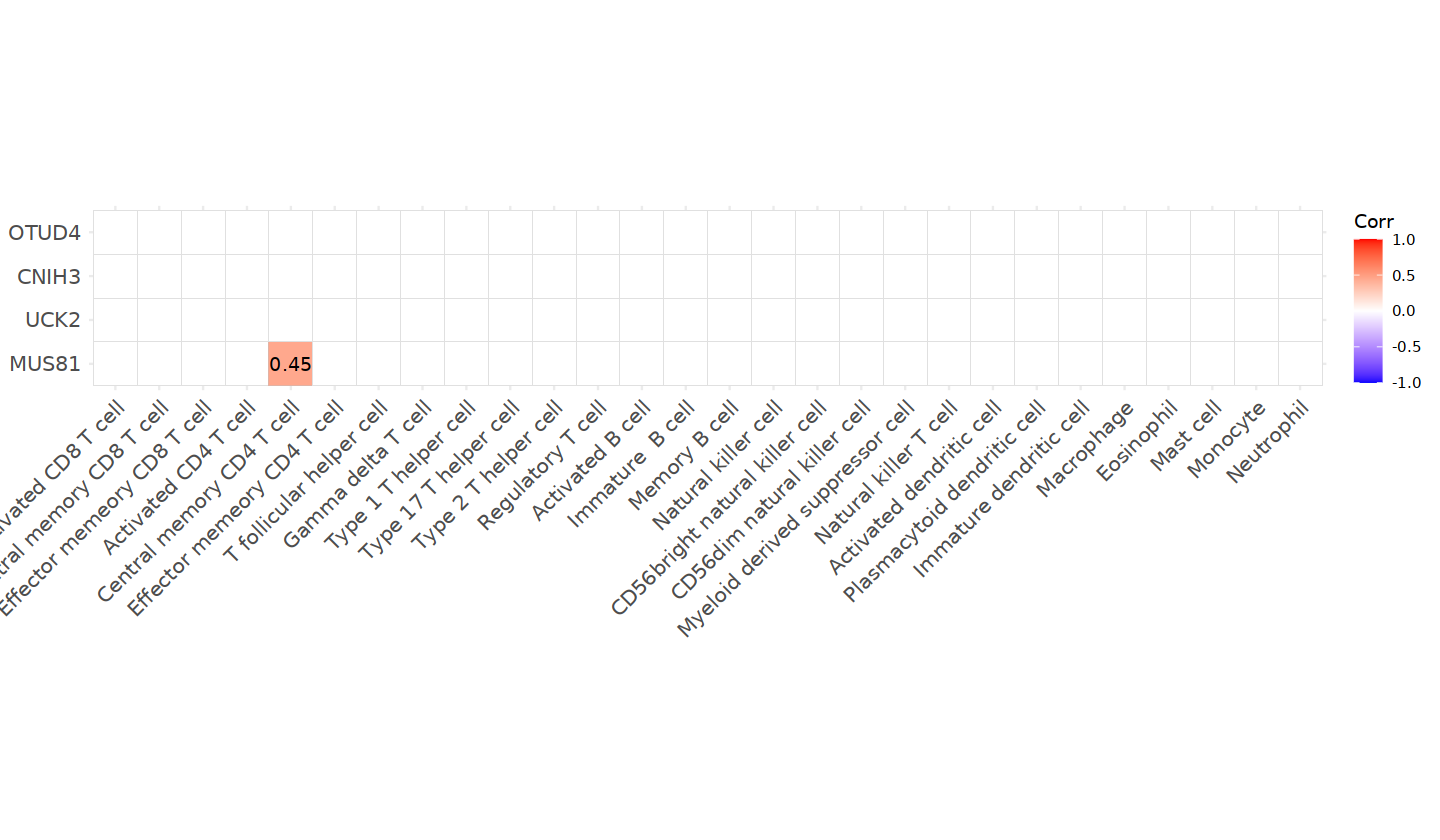

In [68]:
sig_gene <- c(c('MUS81','UCK2','CNIH3','OTUD4'))


library(psych)
x <- expr[,sig_gene]
y <- cell


library(psych)
d <- corr.test(x,y,use="complete",method = 'pearson')

r <- d$r
p <- d$p

library(ggcorrplot)
ggcorrplot(t(d$r), show.legend = T, 
           p.mat = t(d$p.adj), digits = 2,  sig.level = 0.05,insig = 'blank',lab = T)

### 读取nmf分组

In [118]:
load('bulk2.rda')

In [119]:
b=  a %>%  dplyr::filter(sample %in%  rownames(groupinfo))

In [120]:
b$group = groupinfo$group

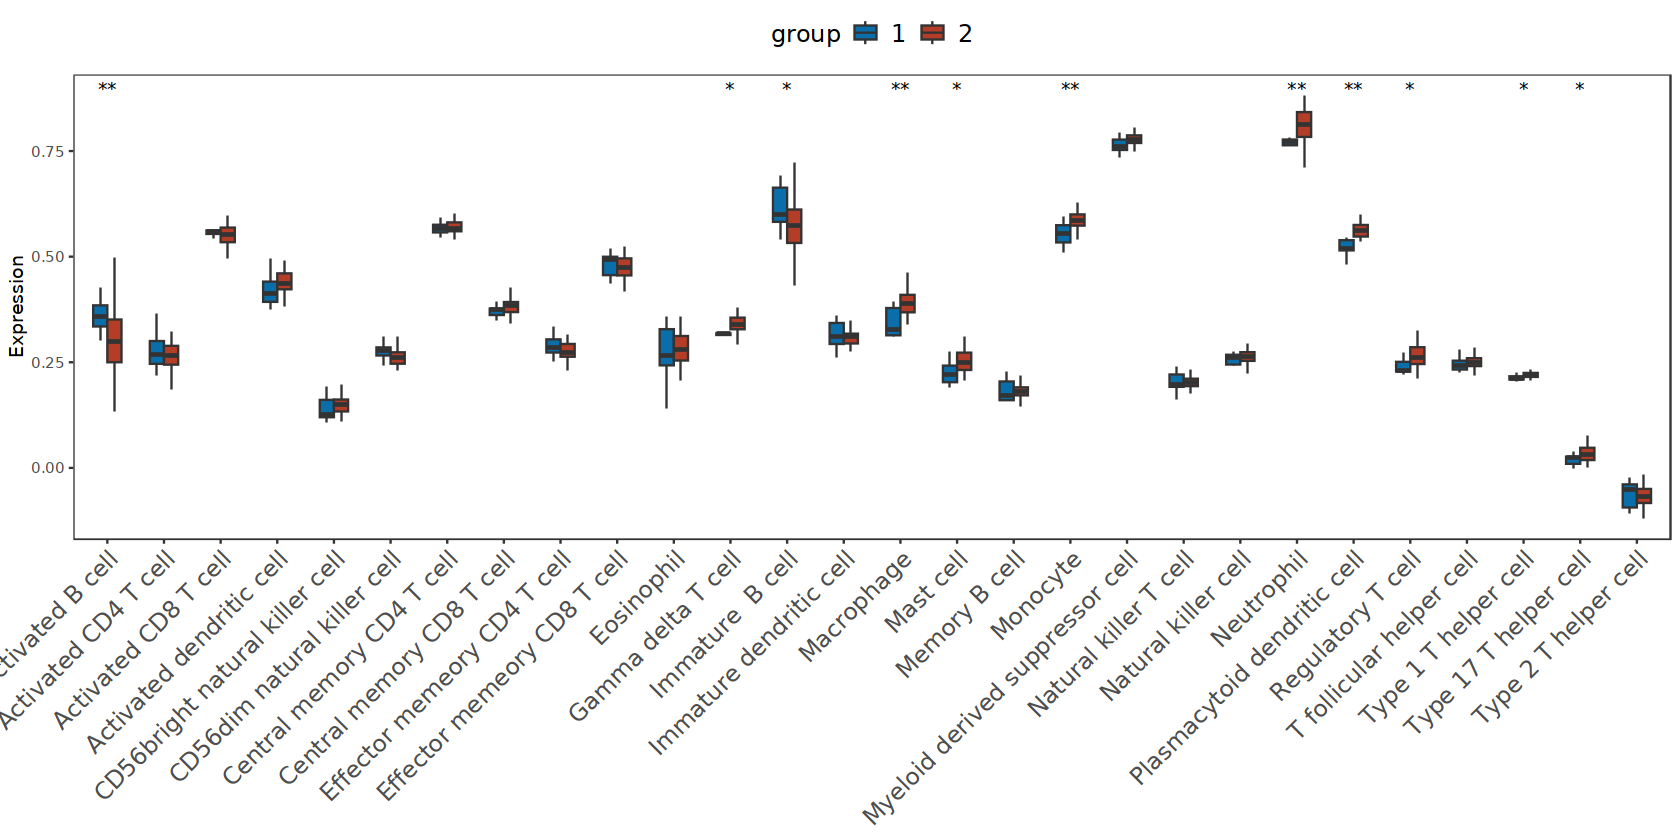

In [121]:
LUAD_ggsea <- gather(b,key = ssgsea, value = Expression, -c(group,sample)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 0.5), 
        axis.text.x = element_text(angle = 45, hjust = 1 ,size = 14),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "wilcox.test",
                     hide.ns = T)

In [122]:
write.csv(a,file = 'ssgsea.csv',row.names =F)

### lasso回归后的细胞

In [123]:
sig_gene <- c('TNFSF14','CCNA2','MARCKS','SGOL1','SAP130')


library(psych)
x <- expr[,sig_gene]
y <- cell

In [128]:
load('./lasso.cell.rda')

In [129]:
y1 = y %>%  dplyr::select(gene_1se)

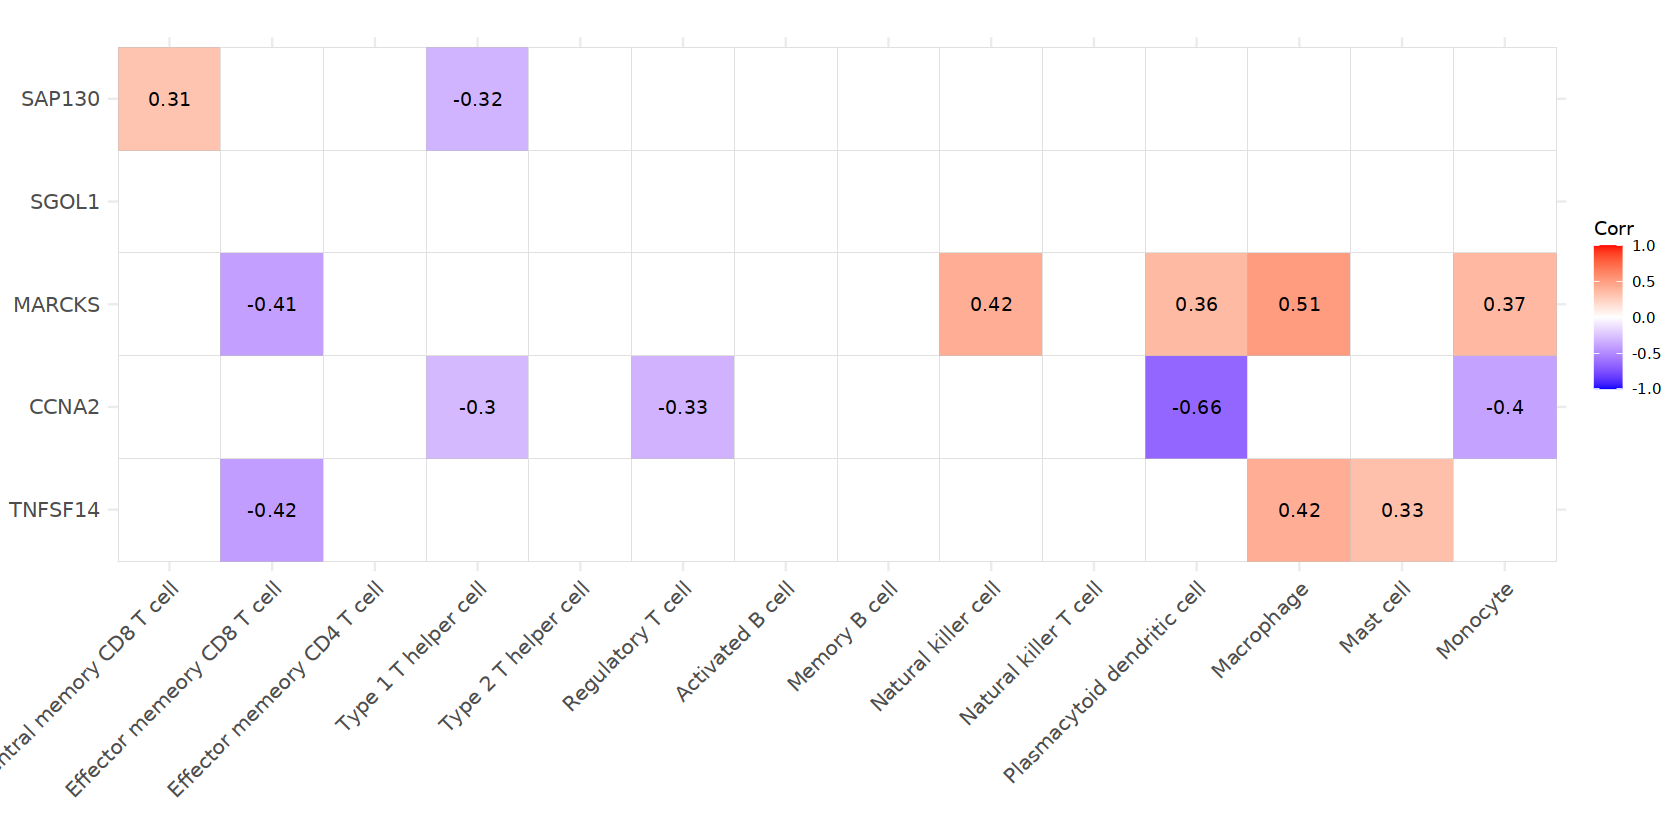

In [132]:
library(psych)
d <- corr.test(x,y1,use="complete",method = 'spearman')

r <- d$r
p <- d$p

library(ggcorrplot)
ggcorrplot(t(d$r), show.legend = T, 
           p.mat = t(d$p.adj), digits = 2,  sig.level = 0.05,insig = 'blank',lab = T)